In [26]:
# Tạo trang R trên colab: https://colab.research.google.com/notebook#create=true&language=r
a <- 5
b <- 7
c <- a + b

In [27]:
fruit <- c("a",'b','c')

In [28]:
print(fruit)

[1] "a" "b" "c"


In [29]:
print(c)

[1] 12


# Lung Function in 1 to 10 Year Old Children

In [30]:
#https://drive.google.com/file/d/1vlrE-Q3mLwcFKgNQYh_pCELwOgcl6k96/view?usp=sharing
system('gdown --id 1vlrE-Q3mLwcFKgNQYh_pCELwOgcl6k96')

In [31]:
data <- read.csv("children_lung.csv")
head(data)

,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


In [32]:
nrow(data)

[1] 654

In [33]:
ncol(data)

[1] 5

In [34]:
summary(data)

      age             FEV               ht             sex        
 Min.   :1.458   Min.   : 0.791   Min.   :46.00   Min.   :0.0000  
 1st Qu.:3.049   1st Qu.: 2.041   1st Qu.:53.50   1st Qu.:0.0000  
 Median :4.330   Median :59.000   Median :57.00   Median :0.0000  
 Mean   :5.205   Mean   :35.210   Mean   :56.92   Mean   :0.4984  
 3rd Qu.:8.000   3rd Qu.:65.000   3rd Qu.:60.00   3rd Qu.:1.0000  
 Max.   :9.000   Max.   :74.000   Max.   :69.00   Max.   :1.0000  
                                  NA's   :345     NA's   :345     
     smoke       
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.0032  
 3rd Qu.:0.0000  
 Max.   :1.0000  
 NA's   :345     

In [35]:
str(data)

'data.frame':	654 obs. of  5 variables:
 $ age  : num  9 8 7 9 9 8 6 6 8 9 ...
 $ FEV  : num  1.71 1.72 1.72 1.56 1.9 ...
 $ ht   : num  57 67.5 54.5 53 57 61 58 56 58.5 60 ...
 $ sex  : int  0 0 0 1 1 0 0 0 0 0 ...
 $ smoke: int  0 0 0 0 0 0 0 0 0 0 ...


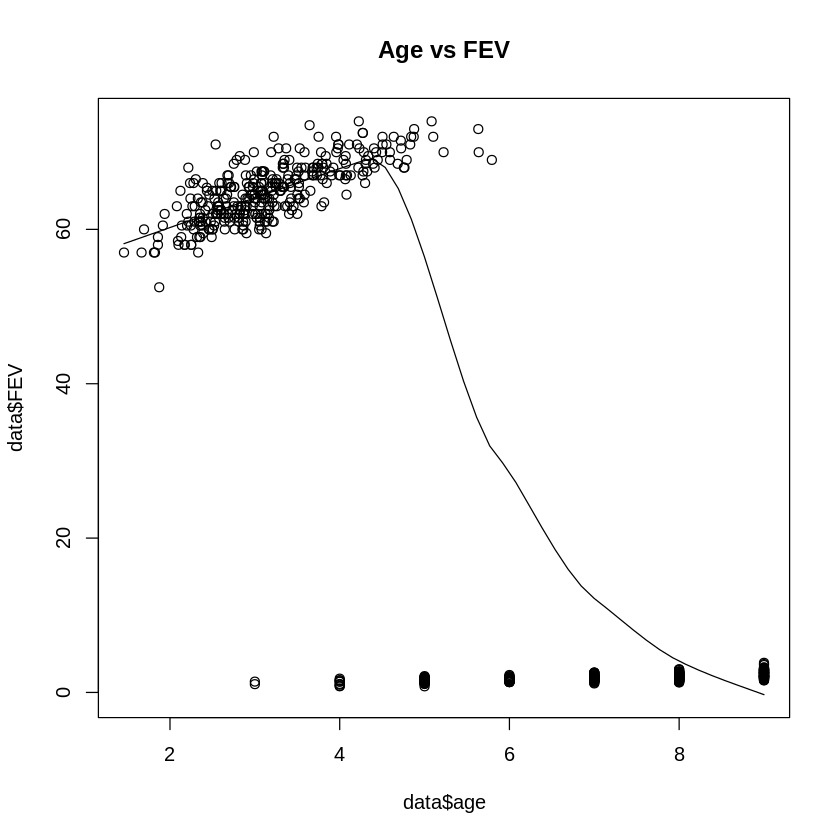

In [36]:
scatter.smooth(x=data$age, y=data$FEV,main="Age vs FEV")

**Nhận xét**
1. FEV chủ yếu > 60 đối với độ tuổi từ 2-6
2. Nhóm trẻ từ 6-9 tuổi lại có FEV rất thấp ~1
3. Dữ liệu phân tán không đều


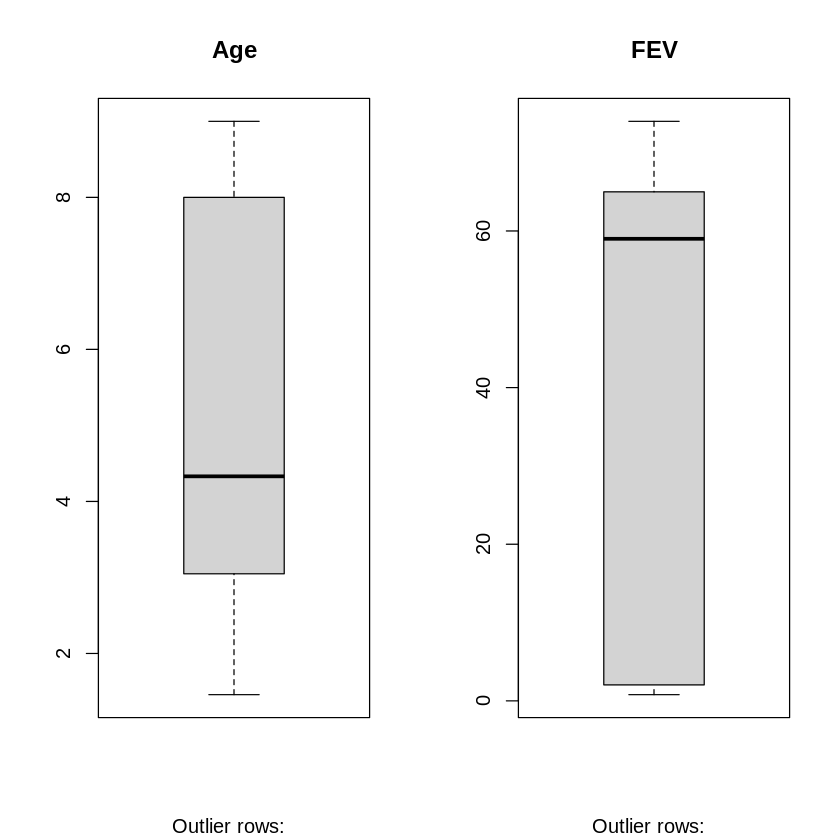

In [37]:
par(mfrow=c(1, 2))
boxplot(data$age, main="Age",
sub=paste("Outlier rows: ",
boxplot.stats(data$age)$out))
boxplot(data$FEV, main="FEV",
sub=paste("Outlier rows: ",
boxplot.stats(data$FEV)$out))

In [38]:
print(cor(data$age, data$FEV))

[1] -0.8614907


In [39]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [40]:
data_FEV_less_10 = filter(data, FEV <10)
head(data_FEV_less_10)

,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
1,9,1.708,57.0,0,0
2,8,1.724,67.5,0,0
3,7,1.720,54.5,0,0
4,9,1.558,53.0,1,0
5,9,1.895,57.0,1,0
6,8,2.336,61.0,0,0


In [41]:
data_FEV_more_10 = filter(data, FEV >=10)
head(data_FEV_more_10)

,age,FEV,ht,sex,smoke
,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2.884,69.0,NA,NA,NA
2,2.328,64.0,NA,NA,NA
3,3.381,63.0,NA,NA,NA
4,2.170,58.0,NA,NA,NA
5,3.470,66.5,NA,NA,NA
6,3.058,60.5,NA,NA,NA


**Với data_FEV_more_10**

In [42]:
data_FEV_more_10=select(data_FEV_more_10, age, FEV)
head(data_FEV_more_10)

,age,FEV
,<dbl>,<dbl>
1,2.884,69.0
2,2.328,64.0
3,3.381,63.0
4,2.170,58.0
5,3.470,66.5
6,3.058,60.5


In [43]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_FEV_more_10), 0.8*nrow(data_FEV_more_10))
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData <- data_FEV_more_10[trainingRowIndex, ] # training data
testData <- data_FEV_more_10[-trainingRowIndex, ] # test data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
  [1]  49 321 153  74 228 146 122 345 128 303  24 327  89 165 110  20 297 333
 [19] 283 109   5 212 259 314 298 335 158 299 322 136 292 340 326 197   4 226
 [37] 215 245 114 262 130   3 258 186 138  40 325  33 103 341 313 157  76 265
 [55]  35 221  16 220 248 118 305  82 331 149  57 100  91 269 181  54 208 246
 [73]  60 108 126 112  72   1 141 206  42 315 287 251 294  25 191  32 238  14
 [91] 111   6 263 175  43 190 332 275 113 274 247 242  31 162  94 224 254 214
[109]  38  95 239  84  15  34 170 309 188  12 337 154  41 193  66  56 152  98
[127] 260  92 107  61 250 256 244 124 194 236 336 155 301 185  28 286  37 207
[145] 308 318 291  78 257 156 339  97 182 127 243 306 180  81 187  27  30 189
[163] 280  75 145  62  13 271 324  63 338 216 116 268 277 161 205   2 159 316
[181] 192 304 179 296 319  51 210  47 222 144  10 343 164 284 169  93 281 234
[199] 204 174 102 276  55 196  58 230  85 171 252  18 143  36  71 201 302 241
[217]  86 330 307 195 225  

In [44]:
lmMod <- lm(FEV ~ age, data=trainingData) # build the model
iPred <- predict(lmMod, testData) # predict length
# mean square error according to model
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))

# mean square error of testData
mse_test = mean((testData$FEV - iPred)^2)
print(paste("mse in test: ", mse_test))

print(paste("r^2:", summary(lmMod)$r.squared))
# => r^2 has average value, this model fits ~ 60% data => not good enough!

# Review diagnostic measures.
print("Summary:")
print(summary (lmMod)) # model summary

# model coefficients
print("Coefficients:")
print(coef(lmMod) )
# get beta estimate for height
beta_age <- coef(lmMod)["age"]
print(paste("slope: ",beta_age))
Intercept <- coef(lmMod)["(Intercept)"]
print(paste("Intercept: ",Intercept))

[1] "mse:  6.07968282939953"
[1] "mse in test:  5.12505266723609"
[1] "r^2: 0.579623492065519"
[1] "Summary:"

Call:
lm(formula = FEV ~ age, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5473 -1.6516 -0.1103  1.4327  8.4313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.9456     0.6451   82.08   <2e-16 ***
age           3.7916     0.1951   19.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.475 on 274 degrees of freedom
Multiple R-squared:  0.5796,	Adjusted R-squared:  0.5781 
F-statistic: 377.8 on 1 and 274 DF,  p-value: < 2.2e-16

[1] "Coefficients:"
(Intercept)         age 
  52.945588    3.791599 
[1] "slope:  3.79159949926029"
[1] "Intercept:  52.9455883849777"


[1] "Solution 1 - results:"
[1] 60.52879 64.32039 68.11199 71.90359
[1] "Solution 2 - results:"
       1        2        3        4 
60.52879 64.32039 68.11199 71.90359 


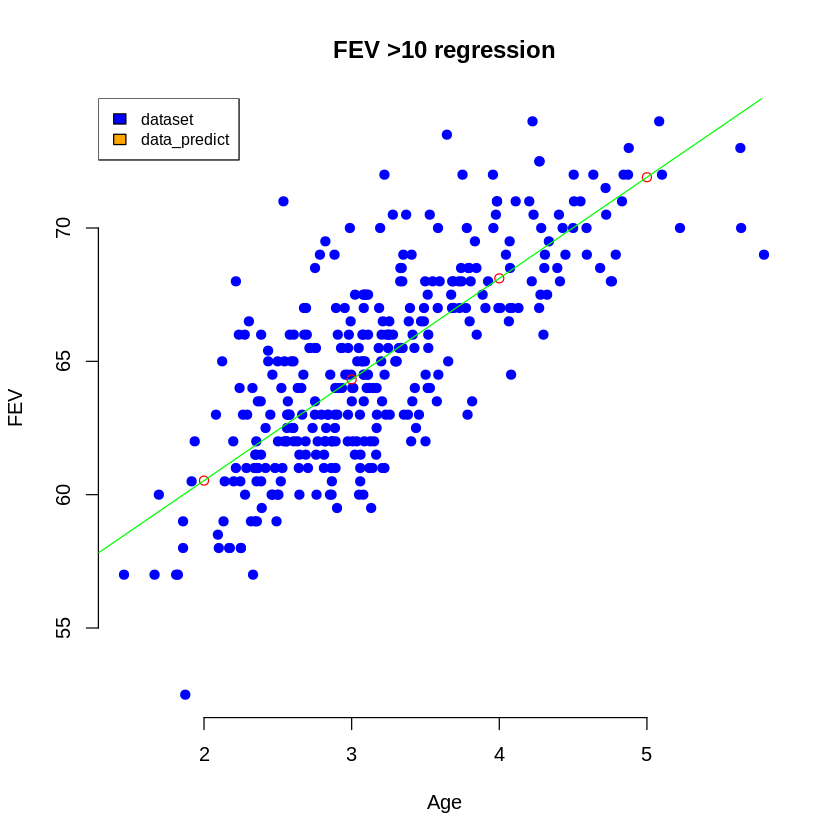

In [45]:
# new predictions
# solution 1
x <- c(2, 3, 4, 5)
y <- Intercept + beta_age * x
print("Solution 1 - results:")
print(y)

# solution 2
y1 <- predict(lmMod, data.frame(age = x))
print("Solution 2 - results:")
print(y1)

# visualization
plot(data_FEV_more_10$age, data_FEV_more_10$FEV,
main = "FEV >10 regression",
xlab = "Age", ylab = "FEV",
pch = 19, frame = FALSE, col= 'blue')
lines(x, y, col= 'red', type='p')
abline(lmMod, data_FEV_more_10, col = "green")
legend("topleft", c("dataset", "data_predict"),
cex=0.8, fill = c("blue", "orange"))

**Với data_FEV_less_10**

In [46]:
data_FEV_less_10=select(data_FEV_less_10, age, ht, FEV)
head(data_FEV_less_10)

,age,ht,FEV
,<dbl>,<dbl>,<dbl>
1,9,57.0,1.708
2,8,67.5,1.724
3,7,54.5,1.720
4,9,53.0,1.558
5,9,57.0,1.895
6,8,61.0,2.336


In [47]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(data_FEV_less_10), 0.8*nrow(data_FEV_less_10))
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData <- data_FEV_less_10[trainingRowIndex, ] # training data
testData <- data_FEV_less_10[-trainingRowIndex, ] # test data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
  [1]  49 153  74 228 146 122 309 128  24  89 165 110  20 300 283 109   5 212
 [19] 259 301 158 136 305 294 197   4 226 215 245 114 262 130   3 258 186 138
 [37]  40 293  33 103 306 286 157  76 265  35 221  16 220 248 118 278  82 152
 [55] 113 287  69 298 104 183 273 149 269  57 100 231  42 254  91  13 181  54
 [73]  83  32 208  60  29  81 108 201 121  85 126 171 275 112  72 233 250 166
 [91]   1 141 206 133 230  55 144  43 243 211  97 185 267  25 115 191 236 232
[109]  14 111   6 175 292 190 299 255 194  31 162  94 199  38  95 189  84  15
[127]  34 170  12 302 154  41  66  56 256  98 217  92 107  61 282 204 124 187
[145] 203 155 274  28 291  37 163 193 272 264  78 169 304 209 127 192 285 202
[163]  27  30 281  75  62 240 227 167  63 303 182 116 219 168   2 151 277 142
[181] 239  65 242  51 234 261 160  47 176  70 119 279  10  71  73 105 173 131
[199] 257  53 134  79  93 246 235 296  80  88 198 137 260  22  26 238  96 280
[217] 214 140  58  45 123  

In [48]:
lmMod <- lm(FEV ~ age+ht, data=trainingData) # build the model
iPred <- predict(lmMod, testData) # predict length
# mean square error according to model
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))

# mean square error of testData
mse_test = mean((testData$FEV - iPred)^2)
print(paste("mse in test: ", mse_test))

print(paste("r^2:", summary(lmMod)$r.squared))
# => r^2 has average value, this model fits ~ 60% data => not good enough!

# Review diagnostic measures.
print("Summary:")
print(summary (lmMod)) # model summary

# model coefficients
print("Coefficients:")
print(coef(lmMod) )
# get beta estimate for height
beta_age <- coef(lmMod)["age"]
print(paste("slope: ",beta_age))
Intercept <- coef(lmMod)["(Intercept)"]
print(paste("Intercept: ",Intercept))

[1] "mse:  0.0858432935888596"
[1] "mse in test:  0.0836047535772128"
[1] "r^2: 0.677475819855278"
[1] "Summary:"

Call:
lm(formula = FEV ~ age + ht, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2740 -0.1784 -0.0085  0.1798  1.0294 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.268106   0.282636 -11.563   <2e-16 ***
age          0.023705   0.020667   1.147    0.253    
ht           0.090022   0.006749  13.338   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2948 on 244 degrees of freedom
Multiple R-squared:  0.6775,	Adjusted R-squared:  0.6748 
F-statistic: 256.3 on 2 and 244 DF,  p-value: < 2.2e-16

[1] "Coefficients:"
(Intercept)         age          ht 
-3.26810604  0.02370527  0.09002153 
[1] "slope:  0.023705269024857"
[1] "Intercept:  -3.26810603532137"


In [49]:
cat("# # # # The Coefficient Values # # # ","\n")
b <- coef(lmMod)[1]
print(b)
mph <- coef(lmMod)[2]
mpd <- coef(lmMod)[3]
print(mph)
print(mpd)

# # # # The Coefficient Values # # #  
(Intercept) 
  -3.268106 
       age 
0.02370527 
        ht 
0.09002153 


In [50]:
x1 <- c(5, 6, 7, 8, 9)
x2 <- c(49.5, 55, 57, 60, 62)
# solution 1
y <- (mph*x1 + mpd*x2 + b)
print("Solution 1 - results:")
print(y)
# solution 2
y1 <- predict(lmMod, data.frame(age = x1,
ht = x2))
print("Solution 2 - results:")
print(y1)

[1] "Solution 1 - results:"
[1] 1.306486 1.825310 2.029058 2.322828 2.526576
[1] "Solution 2 - results:"
       1        2        3        4        5 
1.306486 1.825310 2.029058 2.322828 2.526576 
